# salary estimation based on knn model

### *Importing Libraries*

In [1]:
import pandas as pd
import numpy as np

### *Load Dataset*

In [2]:
dataset = pd.read_csv('salary.csv')

### *Summarize Dataset*

In [3]:
print(dataset.shape)
print(dataset.head(10))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K
5   34              9             0              45  <=50K
6   38              6             0              40  <=50K
7   74             16             0              20   >50K
8   68              9             0              40  <=50K
9   41             10             0              60   >50K


### *Mapping Salary Data to Binary data*

In [4]:
dataset['income'] = dataset['income'].map({'<=50K':0, '>50K':1}).astype(int)

In [5]:
print(dataset.head(10))

   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0
5   34              9             0              45       0
6   38              6             0              40       0
7   74             16             0              20       1
8   68              9             0              40       0
9   41             10             0              60       1


### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [7]:
x = dataset.iloc[:, [0,3]].values
y = dataset.iloc[:, -1].values

### *Splitting Dataset into Train & Test*

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

### *Feature Scaling*
### we scale our data to make all the features contribute equally to the result

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### *Finding the Best K-value*

Text(0, 0.5, 'Mean Error')

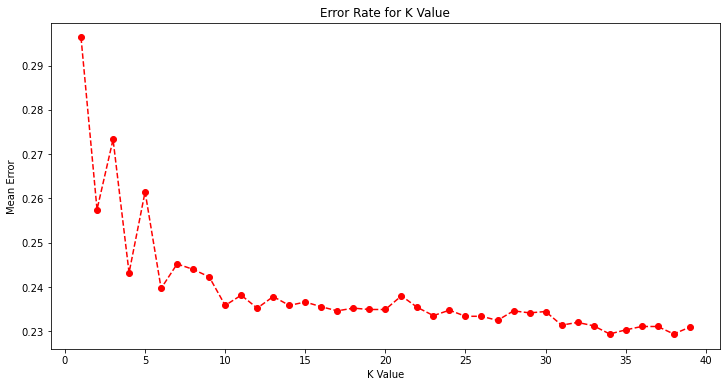

In [16]:
error = []
import matplotlib.pyplot as plt


for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error, color='red', linestyle='dashed', marker='o')
plt.title('Error Rate for K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### *Training*

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=38, metric='minkowski', p=2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=38)

In [24]:
age = int(input("enter new employee age : "))
wh = int(input("enter working hours : "))
new_emp = [[age,wh]]
result = model.predict(sc.transform(new_emp))
print(result)

if result == 1:
    print("employee might got salary above 50k")
else:
    print("employee might not got salary above 50k")

enter new employee age : 41
enter working hours : 61
[0]
employee might not got salary above 50k


### *Prediction for all Test Data*

In [21]:
y_pred = model.predict(x_test)

### *Evaluating Model*

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

acc_score = accuracy_score(y_test, y_pred)*100
print(acc_score)

[[4663  303]
 [1191  356]]
77.06126209120221
